In [11]:
#libraries Initialization
import numpy as np
import pandas as pd
import math
import scipy as sp 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr




PART 1: DATA ARCHITECTURE ANALYSIS

In [12]:
#data Loading and converting data values into numpy array

# I initially used Pandas here because there are both numeric and string values but numpy.isnan is valid for numeric only
# therefore, I calculated the missing values based on pandas data frame 

dataMatrix = pd.read_csv("patient_records.csv")     #Data is stored in pandas DataFrame
Datadimension = dataMatrix.shape
records, attributes = Datadimension
missingvalues = dataMatrix.isna().sum().sum()   #Used Pandas dataFrame to calculate all the missing values {NAN}
dataSparsity = missingvalues/(records*attributes)    #Sparsity calculation 
dataDensity = 1-dataSparsity                         #Density Calculation

attributesTypes = {
    "patient_id": "Nominal (Identifier)",
    "age": "Numeric - Ratio (Continuous)",
    "gender": "Nominal (Categorical)",
    "bmi": "Numeric - Ratio (Continuous)",
    "blood_pressure_systolic": "Numeric - Interval (Continuous)",
    "blood_pressure_diastolic": "Numeric - Interval (Continuous)",
    "cholesterol_level": "Numeric - Ratio (Continuous)",
    "diabetes_type": "Ordinal (Discrete)",
    "heart_disease": "Binary",
    "annual_income": "Numeric - Ratio (Continuous, skewed)",
    "exercise_hours_weekly": "Numeric - Ratio (Continuous)",
    "smoking_status": "Nominal (Categorical)",
    "family_history": "Binary",
    "medication_count": "Numeric - Ratio (Discrete)"

}

report = pd.DataFrame({
    "Attribute": dataMatrix.columns,
    "Type": [attributesTypes[col] for col in dataMatrix.columns],
    "Missing_Values": dataMatrix.isna().sum().values,
    "Unique_Values": dataMatrix.nunique().values,
    "Min": dataMatrix.min(numeric_only=True).reindex(dataMatrix.columns).values,
    "Max": dataMatrix.max(numeric_only=True).reindex(dataMatrix.columns).values,
    "Mean": dataMatrix.mean(numeric_only=True).reindex(dataMatrix.columns).values,
    "StdDev": dataMatrix.std(numeric_only=True).reindex(dataMatrix.columns).values
})

dataMatrix = dataMatrix.values                      # Data stored as numpy data Matrix

print("----------------- <ATTRIBUTES> -------------------------------\n");



for i, typ in attributesTypes.items():
    print(f"- {i}: {typ}")

print("\n\nDimensions: ",Datadimension,"\nSparsity: ",dataSparsity, "\nDensity: ",dataDensity)
pd.set_option("display.max_columns", None)
print("\n--- < Data Quality Report > ---\n")
print(report)


# I saved the generated report as a csv file 
report.to_csv("datareport.csv", index=False)
print("\nData Quality Report saved as 'datareport.csv'")





----------------- <ATTRIBUTES> -------------------------------

- patient_id: Nominal (Identifier)
- age: Numeric - Ratio (Continuous)
- gender: Nominal (Categorical)
- bmi: Numeric - Ratio (Continuous)
- blood_pressure_systolic: Numeric - Interval (Continuous)
- blood_pressure_diastolic: Numeric - Interval (Continuous)
- cholesterol_level: Numeric - Ratio (Continuous)
- diabetes_type: Ordinal (Discrete)
- heart_disease: Binary
- annual_income: Numeric - Ratio (Continuous, skewed)
- exercise_hours_weekly: Numeric - Ratio (Continuous)
- smoking_status: Nominal (Categorical)
- family_history: Binary
- medication_count: Numeric - Ratio (Discrete)


Dimensions:  (30000, 14) 
Sparsity:  0.023702380952380954 
Density:  0.976297619047619

--- < Data Quality Report > ---

                   Attribute                                  Type  \
0                 patient_id                  Nominal (Identifier)   
1                        age          Numeric - Ratio (Continuous)   
2              

In [13]:
# I have calculated Mean, Median and Mode here

#Mean Calculation
meansum = np.zeros(attributes)
mediansum = np.zeros(attributes)
modesum = [None] * attributes
varianceAttr = np.zeros(attributes)
sdAttr  = np.zeros(attributes)
count = 0

print(type(dataMatrix[0][0]))
for j in range(attributes):
    count=0
    numvals=[]
    for i in range(records):       
        if(type(dataMatrix[i][j])==type(5) or type(dataMatrix[i][j])==type(5.5)):  # Calculating Mean of each Attribute
            meansum[j]+=dataMatrix[i][j]
            count+=1
            numvals.append(dataMatrix[i][j])
        else:
            break
    if(meansum[j]>0):
        meansum[j]/=count
    else:
        meansum[j]=0
    if len(numvals)>0:                   #Calcuating Median of each attribute     
        sortedvals = sorted(numvals)
        sizearr = len(sortedvals)
        mid = sizearr//2
        if sizearr%2==0:
            mediansum[j] = (sortedvals[mid - 1] + sortedvals[mid]) / 2
        else:
            mediansum[j] = sortedvals[mid]

        freq = {}
        for v in numvals:
            freq[v] = freq.get(v, 0) + 1
        max_count = max(freq.values())
        if max_count == 1:   # all unique
            modesum[j] = "No mode"
        else:
            modes = [k for k, v in freq.items() if v == max_count]
            modesum[j] = modes

        varsum = 0                                         #Calculating Variance of each attribute
        for x in numvals:
            varsum = varsum + (x-meansum[j])**2
        varianceAttr[j] = varsum/len(numvals) 
        sdAttr[j] = np.sqrt(varianceAttr[j])               #Calculating Standard Deviation of each attribute
    else:
        mediansum[j] = 0
        modesum[j] = "non-Numeric"
        varianceAttr[j] = np.nan
        sdAttr[j] = np.nan

    
#Printing Mean, Median , Mode, Variance and Standard Deviation

print("------------------------- Mean -------------------------------")
for i in range(attributes):
    print(meansum[i])

print("------------------------- Median -------------------------------")
for i in range(attributes):
    print(mediansum[i])

print("------------------------- Mode -------------------------------")
for i in range(attributes):
    print(modesum[i])

print("------------------------- Variances --------------------------")
for i in range(attributes):
    print(varianceAttr[i])   

print("------------------------- Standard Deviations --------------------------")
for i in range(attributes):
    print(sdAttr[i])
  








<class 'int'>
------------------------- Mean -------------------------------
15000.5
0.0
0.0
0.0
119.6029
79.4218
199.4116
0.0
0.2988
27.716349333333497
3.053893333333323
0.0
0.39586666666666664
1.9944333333333333
------------------------- Median -------------------------------
15000.5
35.0
0.0
29.55511778497328
119.0
79.0
199.0
0.0
0.0
20.22
3.0
0.0
0.0
2.0
------------------------- Mode -------------------------------
No mode
[89.0]
non-Numeric
No mode
[118]
[80]
[198]
[0.0]
[0]
[12.24, 17.35]
[0.0]
non-Numeric
[0]
[2]
------------------------- Variances --------------------------
74999999.91666667
nan
nan
nan
323.59621158999477
101.16355142666787
1617.3948521066766
nan
0.20951856000008776
685.1722180392957
3.5561555086224685
nan
0.2391562488887832
1.9880690122229576
------------------------- Standard Deviations --------------------------
8660.254033033134
nan
nan
nan
17.988780158476416
10.058009317288779
40.21684786388258
nan
0.4577319739761335
26.175794506362088
1.8857771630345057


In [14]:
# Step 1: Get column names and numeric column indices
colnames = list(attributesTypes.keys())
numeric_columns = [i for i, col in enumerate(colnames)
                   if 'Numeric' in attributesTypes[col] or attributesTypes[col] in ['Binary', 'Ordinal (Discrete)']]
numeric_col_names = [colnames[i] for i in numeric_columns]

# Step 2: Extract numeric columns from dataMatrix and convert to float
numeric_data = np.empty((dataMatrix.shape[0], len(numeric_columns)), dtype=float)

for i, col_idx in enumerate(numeric_columns):
    for j in range(dataMatrix.shape[0]):
        try:
            numeric_data[j, i] = float(dataMatrix[j, col_idx])
        except (ValueError, TypeError):
            numeric_data[j, i] = np.nan  # Set non-numeric or missing as NaN


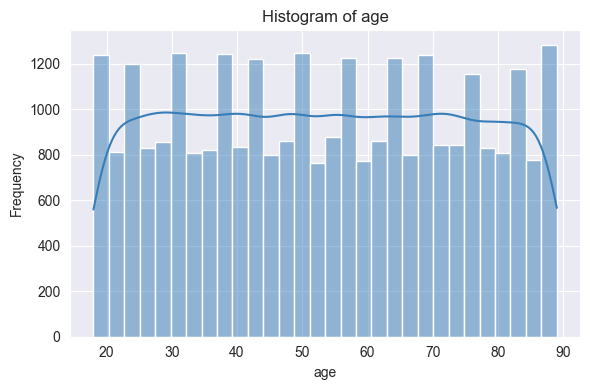

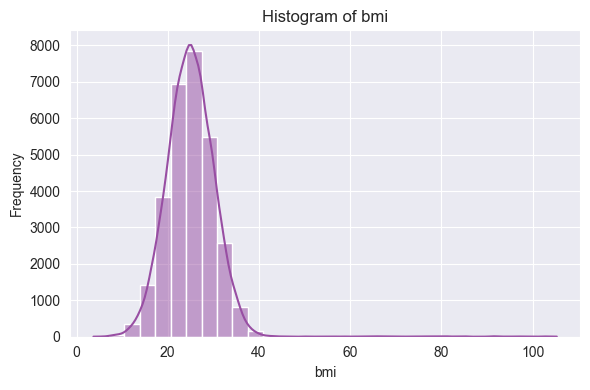

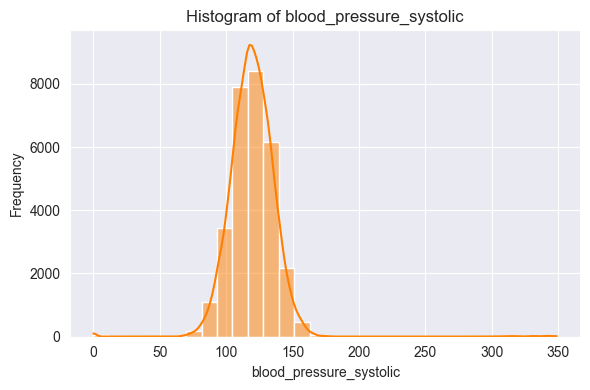

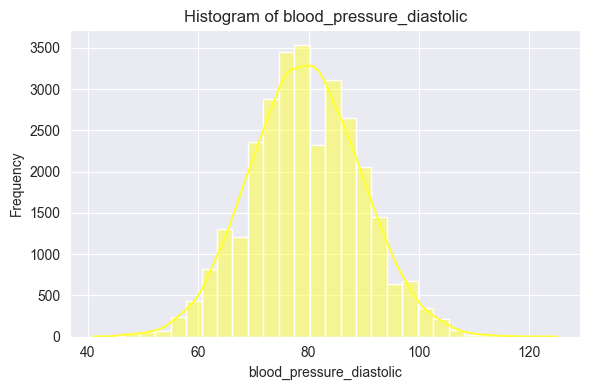

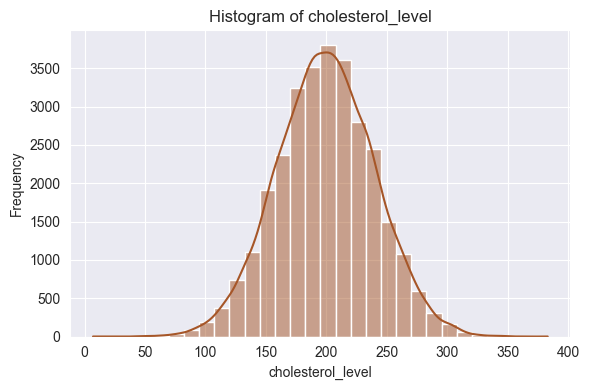

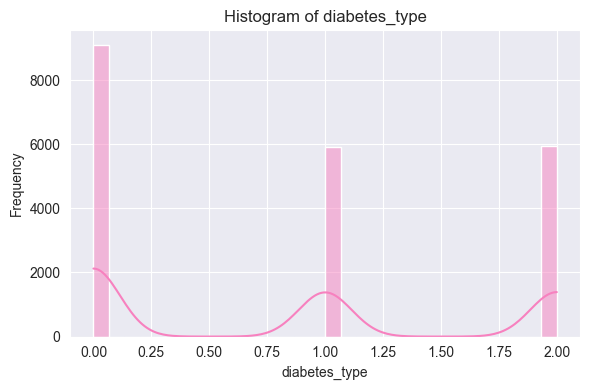

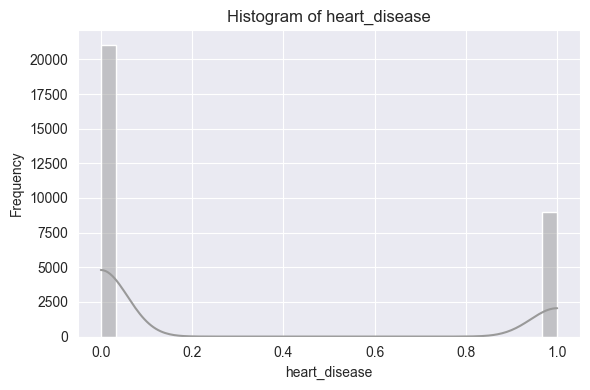

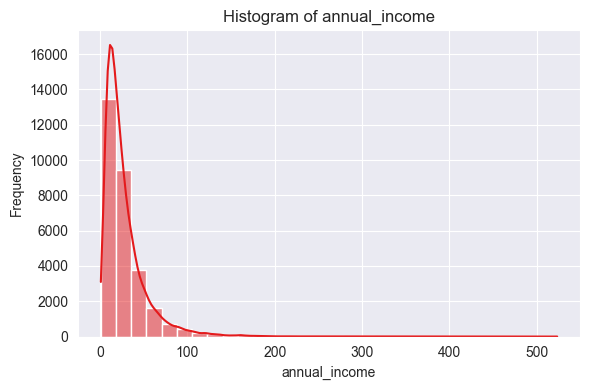

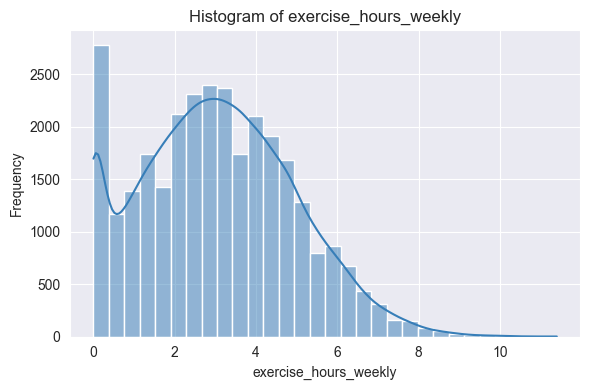

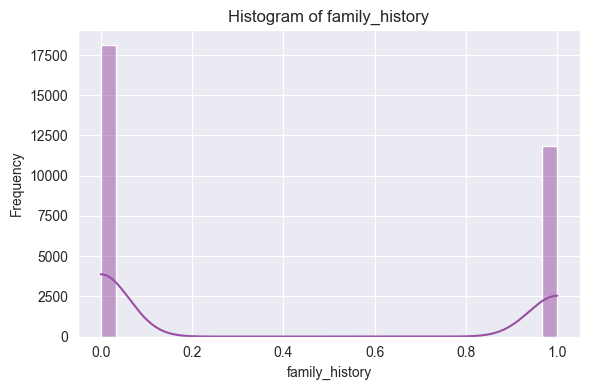

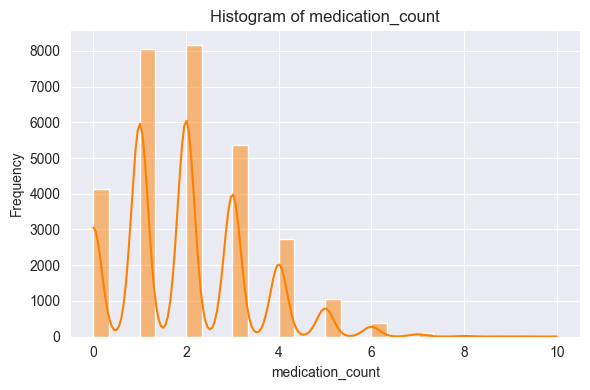

In [15]:
sns.set_style('darkgrid')
palette = sns.color_palette("Set1")

for i in numeric_columns:
    coldata = dataMatrix[:, i]
    
    # Convert to float and remove NaNs
    try:
        coldata = coldata.astype(float)
        coldata = coldata[~np.isnan(coldata)]
    except (ValueError, TypeError):
        continue  # Skip non-numeric column

    plt.figure(figsize=(6, 4))
    sns.histplot(coldata, kde=True, bins=30, color=palette[i % len(palette)])
    plt.title(f'Histogram of {colnames[i]}')
    plt.xlabel(colnames[i])
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

age:
 Min: 18.0, Q1: 35.0, Median: 53.0, Q3: 71.0, Max: 89.0
 IQR: 36.0, Outliers detected: 0


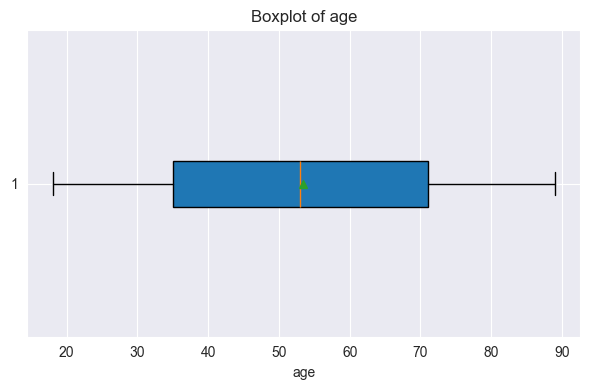

bmi:
 Min: 3.7149535587600298, Q1: 21.625684282932546, Median: 24.958152930314288, Q3: 28.340796484800286, Max: 105.31820122938176
 IQR: 6.71511220186774, Outliers detected: 323


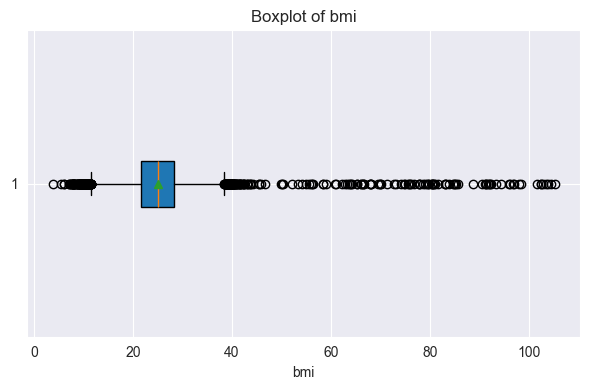

blood_pressure_systolic:
 Min: 0.0, Q1: 109.0, Median: 119.0, Q3: 130.0, Max: 349.0
 IQR: 21.0, Outliers detected: 264


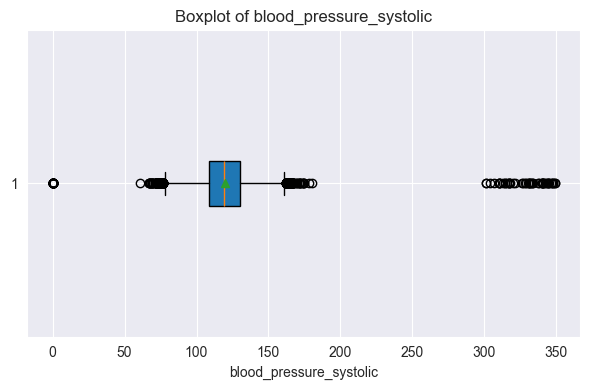

blood_pressure_diastolic:
 Min: 41.0, Q1: 73.0, Median: 79.0, Q3: 86.0, Max: 125.0
 IQR: 13.0, Outliers detected: 280


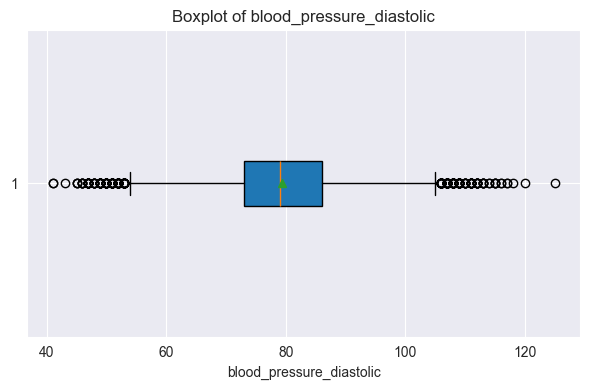

cholesterol_level:
 Min: 7.0, Q1: 172.0, Median: 199.0, Q3: 227.0, Max: 383.0
 IQR: 55.0, Outliers detected: 178


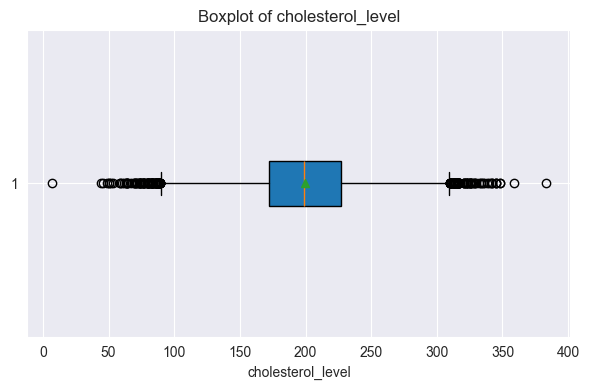

diabetes_type:
 Min: 0.0, Q1: 0.0, Median: 1.0, Q3: 2.0, Max: 2.0
 IQR: 2.0, Outliers detected: 0


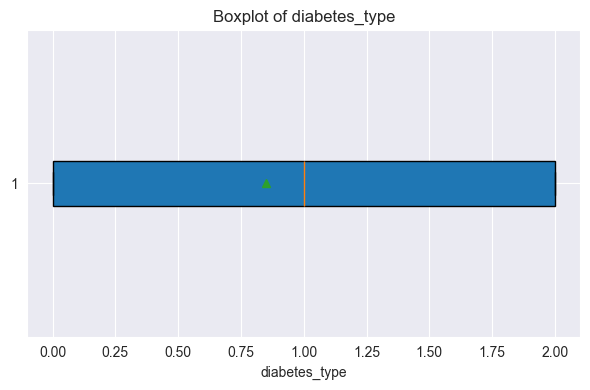

heart_disease:
 Min: 0.0, Q1: 0.0, Median: 0.0, Q3: 1.0, Max: 1.0
 IQR: 1.0, Outliers detected: 0


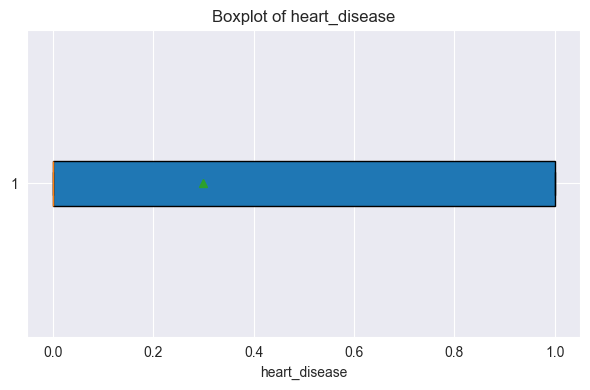

annual_income:
 Min: 0.75, Q1: 11.8, Median: 20.22, Q3: 34.54, Max: 523.44
 IQR: 22.74, Outliers detected: 1845


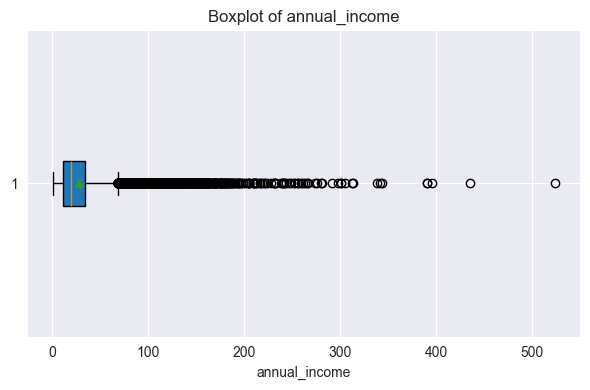

exercise_hours_weekly:
 Min: 0.0, Q1: 1.6, Median: 3.0, Q3: 4.3, Max: 11.4
 IQR: 2.6999999999999997, Outliers detected: 118


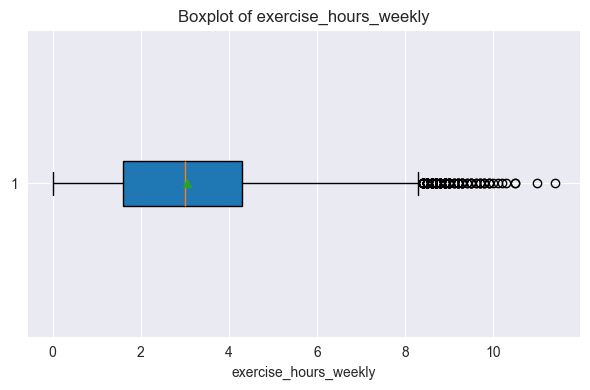

family_history:
 Min: 0.0, Q1: 0.0, Median: 0.0, Q3: 1.0, Max: 1.0
 IQR: 1.0, Outliers detected: 0


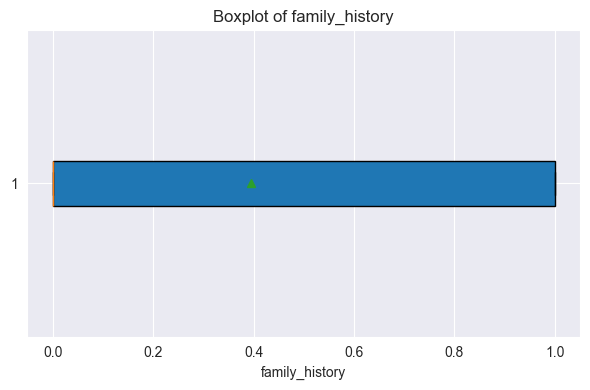

medication_count:
 Min: 0.0, Q1: 1.0, Median: 2.0, Q3: 3.0, Max: 10.0
 IQR: 2.0, Outliers detected: 115


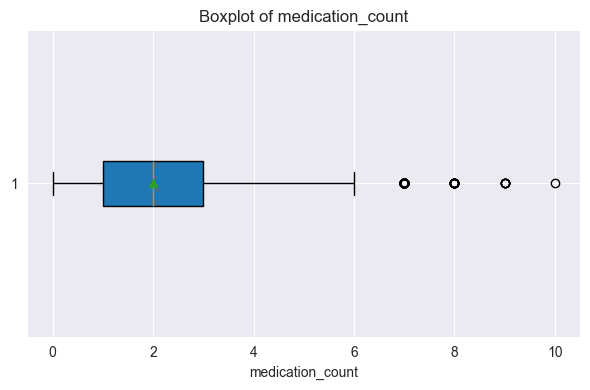

In [16]:
for i in numeric_columns:
    col_data = numeric_data[:, numeric_columns.index(i)]   # Get column data by position
    col_data = col_data[~np.isnan(col_data)]  # Remove NaNs

    if len(col_data) == 0:
        print(f"{colnames[i]}: Skipped (all values are NaN)")
        continue

    minimum = np.min(col_data)
    q1 = np.percentile(col_data, 25)
    q3 = np.percentile(col_data, 75)
    median = np.median(col_data)
    maximum = np.max(col_data)
    iqr = q3 - q1
    lowerbound = q1 - (1.5 * iqr)
    upperbound = q3 + (1.5 * iqr)
    outliers = col_data[(col_data < lowerbound) | (col_data > upperbound)]

    print(f"{colnames[i]}:")
    print(f" Min: {minimum}, Q1: {q1}, Median: {median}, Q3: {q3}, Max: {maximum}")
    print(f" IQR: {iqr}, Outliers detected: {len(outliers)}")

    plt.figure(figsize=(6, 4))
    plt.boxplot(col_data, vert=False, patch_artist=True, showmeans=True)
    plt.title(f"Boxplot of {colnames[i]}")
    plt.xlabel(colnames[i])
    plt.tight_layout()
    plt.show()



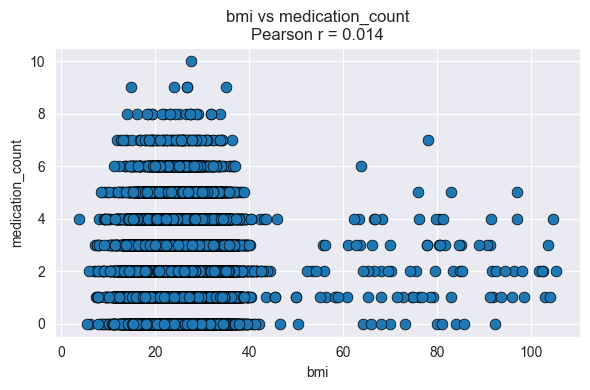

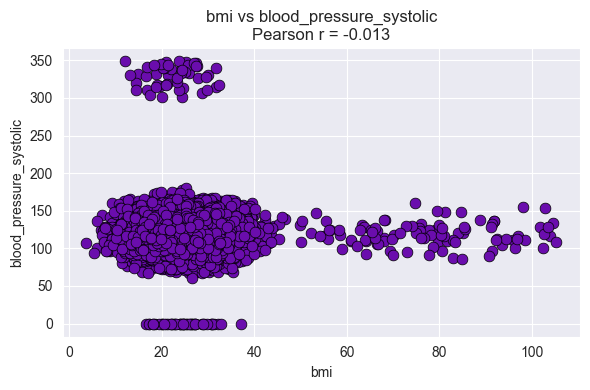

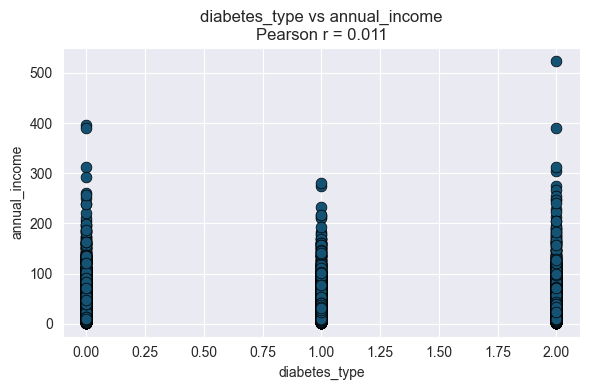

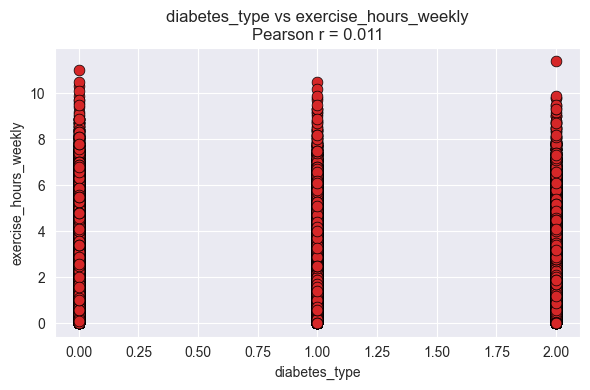

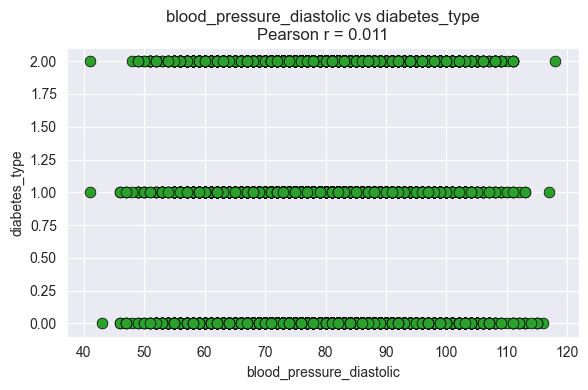

In [17]:

from scipy.stats import pearsonr
from itertools import combinations

sns.set_style("darkgrid")

# Step 1: Generate all attribute pairs
pairs = list(combinations(numeric_col_names, 2))
correlations = []

# Step 2: Compute Pearson correlations with NaN handling
for x_name, y_name in pairs:
    x_idx = numeric_col_names.index(x_name)
    y_idx = numeric_col_names.index(y_name)
    x = numeric_data[:, x_idx]
    y = numeric_data[:, y_idx]

    mask = ~np.isnan(x) & ~np.isnan(y)
    x_clean = x[mask]
    y_clean = y[mask]

    if len(x_clean) >= 3:
        corr, _ = pearsonr(x_clean, y_clean)
        correlations.append((x_name, y_name, corr))

# Step 3: Sort and get top 5 strongest correlations
top_5 = sorted(correlations, key=lambda x: abs(x[2]), reverse=True)[:5]

# Step 4: Assign a unique "vs" color to each pair
pair_vs_colors = {
    (x, y): color for (x, y), color in zip(
        [(a, b) for a, b, _ in top_5],
        ['#1f77b4', '#6a0dad', '#145374', '#d62728', '#2ca02c']  # blue, purple, teal, red, green
    )
}

# Step 5: Plot each with its assigned color
for x_name, y_name, corr in top_5:
    x_idx = numeric_col_names.index(x_name)
    y_idx = numeric_col_names.index(y_name)
    x = numeric_data[:, x_idx]
    y = numeric_data[:, y_idx]
    mask = ~np.isnan(x) & ~np.isnan(y)
    x_clean = x[mask]
    y_clean = y[mask]

    pair = (x_name, y_name)
    color = pair_vs_colors.get(pair, '#333333')  # fallback color

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=x_clean, y=y_clean, color=color, s=60, edgecolor='black', linewidth=0.5)
    plt.title(f"{x_name} vs {y_name}\nPearson r = {corr:.3f}", fontsize=12)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.tight_layout()
    plt.show()


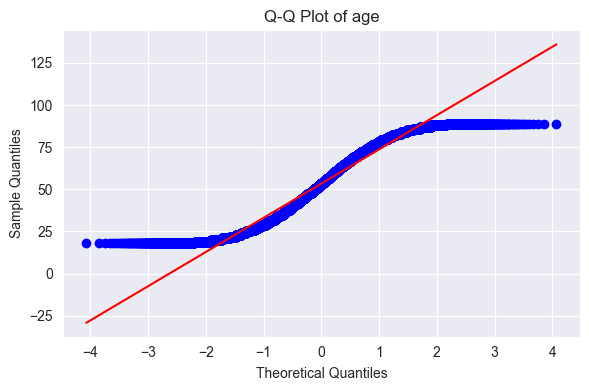

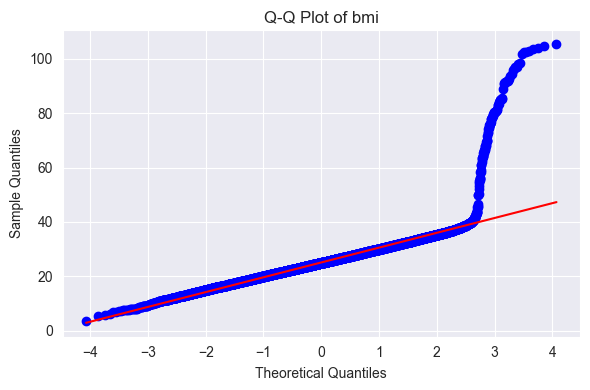

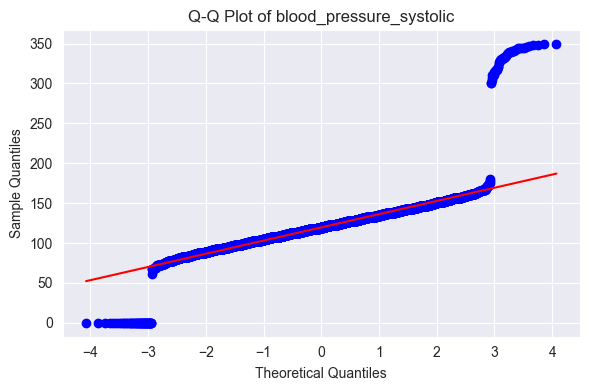

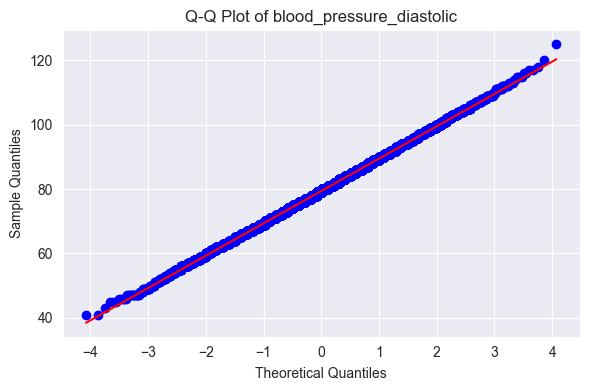

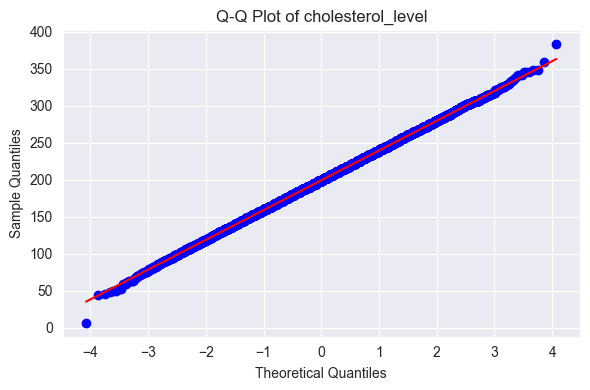

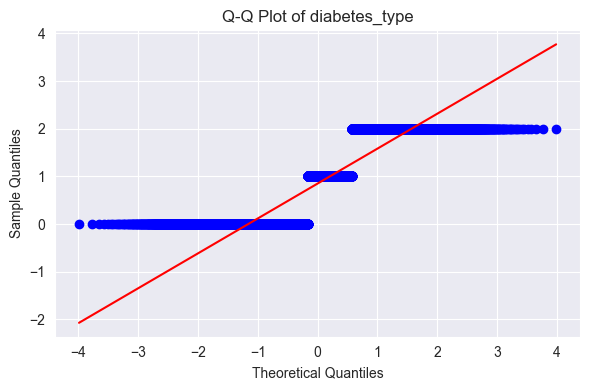

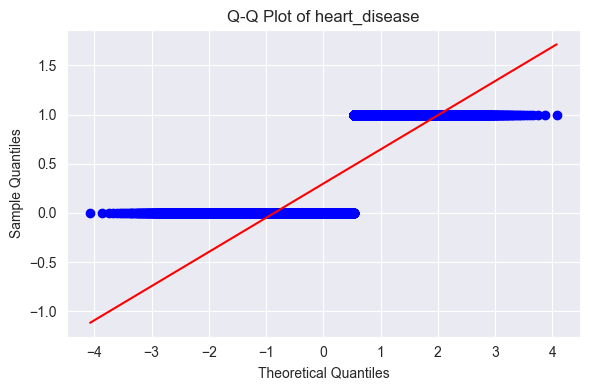

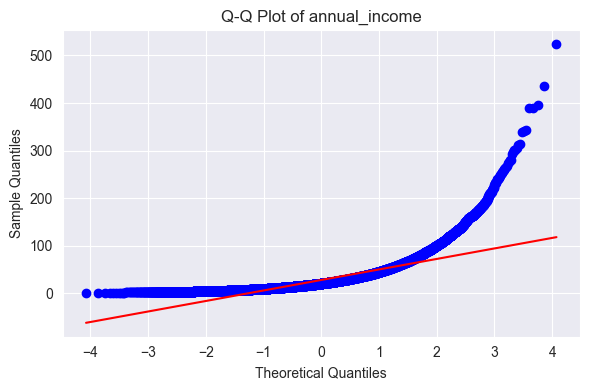

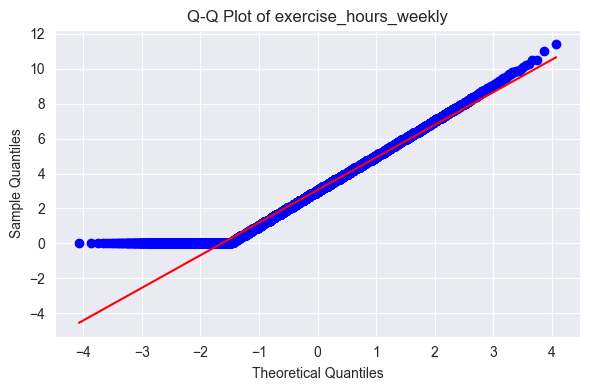

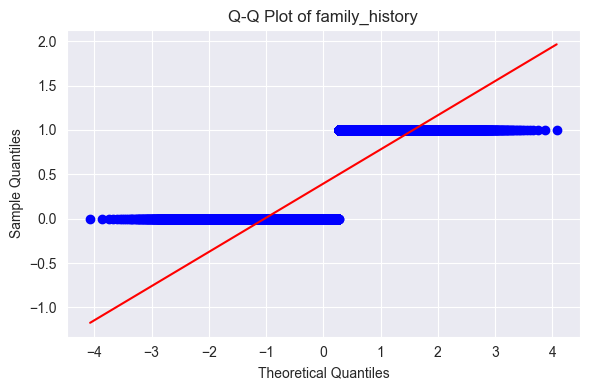

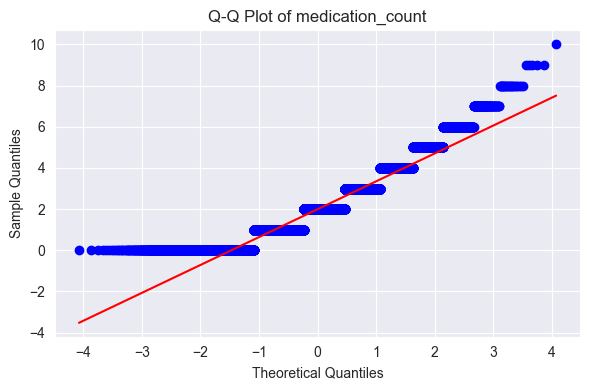

In [18]:
import scipy.stats as stats
import matplotlib.pyplot as plt

for idx, col_name in enumerate(numeric_col_names):
    col = numeric_data[:, idx]
    col = col[~np.isnan(col)]  # Remove NaNs

    if len(col) < 3:
        print(f"Skipping Q-Q plot for {col_name} (too few valid values)")
        continue

    plt.figure(figsize=(6, 4))
    stats.probplot(col, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col_name}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.tight_layout()
    plt.show()